# TITLE: Movie Recommendation system
## Collaborators
1. Ezra Kipchirchir
2. Sharon Kaliku
3. Mercy Tegekson
4. Robinson Mumo
5. Allen Maina
6. Candy Gudda

### Project Overview



### Introduction



### Challenges




### Proposed solutions



### Problem statement



### Data understanding
`movieId`: Identifier for a movie.
#
`title`: The title of the movie.
#
`genres`: The genres associated with the movie.
#
`userId_x`: User identifier from the first DataFrame.
#
`rating`: Rating given by a user for a particular movie.
#
`timestamp_x`: Timestamp of the rating from the first DataFrame.
#
`userId_y`: User identifier from the second DataFrame.
#
`tag`: Tag associated with a movie from the second DataFrame.
#
`timestamp_y`: Timestamp of the tag from the second DataFrame.
#
`imdbId`: IMDb ID is a unique identifier assigned to each title (movie, TV show, etc.) on IMDb
#
`tmdbId`: TMDb ID is a unique identifier assigned to each title (movie or TV show) on TMDb.
#### 1. Importing the required libraries and modules for our project

In [22]:
# importing modules
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from functions import sns_ycount, sns_xcount
from recommender import recommender_system
from functools import reduce
from datetime import datetime



#### 1.2 loading and doing the necessary inspection on our data

In [23]:
links = pd.read_csv("data/links.csv")
links

movieId   imdbId    tmdbId
0           1   114709     862.0
1           2   113497    8844.0
2           3   113228   15602.0
3           4   114885   31357.0
4           5   113041   11862.0
...       ...      ...       ...
9737   193581  5476944  432131.0
9738   193583  5914996  445030.0
9739   193585  6397426  479308.0
9740   193587  8391976  483455.0
9741   193609   101726   37891.0

[9742 rows x 3 columns]

In [24]:
movies = pd.read_csv("data/movies.csv")
movies

movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama|Romance  
4                                          Comedy  
...                                           ...  
9737              Action|Animation|Comedy|Fantasy  
9738                     Animation|Comedy|Fantasy  
9739                                        Drama  
9740                             Action|Animation  
9741                                       Comedy  

[9742 rows x 3 columns]

In [25]:
ratings = pd.read_csv("data/ratings.csv")
ratings

userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
...        ...      ...     ...         ...
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415

[100836 rows x 4 columns]

Key Insights from ratings_df:
#
Rating Range: Users have provided ratings in a range from 0.5 to 5.0, indicating diverse opinions about the movies.
#
Average Rating: The average rating across all movies is 3.5, suggesting that users, on average, tend to give moderate ratings.
#
User IDs: The dataset includes user IDs ranging from 1 to 610, representing a total of 610 unique users.
#
Movie IDs: Movie IDs span from 1 to 193609, with 193609 being the highest movie ID. Note that this represents the highest movie ID and not necessarily the total count of movies in the dataset.
#
These insights provide a foundational understanding of the dataset's characteristics and the user-movie interactions.

In [26]:
tags = pd.read_csv("data/tags.csv")
tags

userId  movieId               tag   timestamp
0          2    60756             funny  1445714994
1          2    60756   Highly quotable  1445714996
2          2    60756      will ferrell  1445714992
3          2    89774      Boxing story  1445715207
4          2    89774               MMA  1445715200
...      ...      ...               ...         ...
3678     606     7382         for katie  1171234019
3679     606     7936           austere  1173392334
3680     610     3265            gun fu  1493843984
3681     610     3265  heroic bloodshed  1493843978
3682     610   168248  Heroic Bloodshed  1493844270

[3683 rows x 4 columns]

#### 1.2 Merging our four datasets into one dataframe 

In [27]:
# List of DataFrames to merge
dataframes = [movies, ratings, tags, links]

# Use reduce() and pd.merge() to merge the DataFrames
merged_data = reduce(lambda left, right: pd.merge(left, right, on= "movieId"), dataframes)
#inspecting the first five rows
merged_data.head()


movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId_x  rating  timestamp_x  userId_y    tag  timestamp_y  imdbId  tmdbId  
0         1     4.0    964982703       336  pixar   1139045764  114709   862.0  
1         1     4.0    964982703       474  pixar   1137206825  114709   862.0  
2         1     4.0    964982703       567    fun   1525286013  114709   862.0  
3         5     4.0    847434962       336  pixar   1139045764  114709   862.0  
4         5     4.0    847434962       474  pixar   1137206825  114709   862.0

In [28]:
merged_data["timestamp_x"].dtype

dtype('int64')

Changing rating timestamp and tag timestamp to human readable format for easy analysis

In [29]:
#using utcfromtimestamp method from datetime module to convert timestamps to human readable format
merged_data["rating_timestamp"] = merged_data["timestamp_x"].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
merged_data["tag_timestamp"] = merged_data["timestamp_y"].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
#changing the timestamps to pandas datetime objects
merged_data["rating_timestamp"] = pd.to_datetime(merged_data["rating_timestamp"])
merged_data["tag_timestamp"] = pd.to_datetime(merged_data["tag_timestamp"])
merged_data.drop(columns=["timestamp_x", "timestamp_y"], axis= 1, inplace= True)
merged_data.head()


movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId_x  rating  userId_y    tag  imdbId  tmdbId    rating_timestamp  \
0         1     4.0       336  pixar  114709   862.0 2000-07-30 18:45:03   
1         1     4.0       474  pixar  114709   862.0 2000-07-30 18:45:03   
2         1     4.0       567    fun  114709   862.0 2000-07-30 18:45:03   
3         5     4.0       336  pixar  114709   862.0 1996-11-08 06:36:02   
4         5     4.0       474  pixar  114709   862.0 1996-11-08 06:36:02   

        tag_timestamp  
0 2006-02-04 09:36:04  
1 2006-01-14 02:47:05  
2 2018-05-02 18:33:33  
3 2006-02-04 09:36:04  
4 2006-01-14 02:47:05

In [30]:
#info
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233213 entries, 0 to 233212
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   movieId           233213 non-null  int64         
 1   title             233213 non-null  object        
 2   genres            233213 non-null  object        
 3   userId_x          233213 non-null  int64         
 4   rating            233213 non-null  float64       
 5   userId_y          233213 non-null  int64         
 6   tag               233213 non-null  object        
 7   imdbId            233213 non-null  int64         
 8   tmdbId            233213 non-null  float64       
 9   rating_timestamp  233213 non-null  datetime64[ns]
 10  tag_timestamp     233213 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(4), object(3)
memory usage: 19.6+ MB


Our data seems to have no null values nor missing data
#
We will go ahed and do summary statistics for our numerical columns

In [31]:
#summary statistics
merged_data.describe()

movieId       userId_x         rating       userId_y  \
count  233213.000000  233213.000000  233213.000000  233213.000000   
mean    12319.999443     309.688191       3.966535     470.683564   
min         1.000000       1.000000       0.500000       2.000000   
25%       296.000000     156.000000       3.500000     424.000000   
50%      1198.000000     309.000000       4.000000     477.000000   
75%      4638.000000     460.000000       5.000000     599.000000   
max    193565.000000     610.000000       5.000000     610.000000   
std     28243.919401     178.206387       0.968637     153.329632   

             imdbId         tmdbId               rating_timestamp  \
count  2.332130e+05  233213.000000                         233213   
mean   2.610632e+05    9378.277742  2008-06-15 10:00:05.688053504   
min    1.234900e+04      11.000000            1996-03-29 18:36:55   
25%    1.103570e+05     278.000000            2002-03-29 01:16:06   
50%    1.109120e+05     680.000000            2008-07-29 09:45:57   
75%    1.724950e+05    1892.000000            2015-09-25 17:11:10   
max    5.580390e+06  503475.000000            2018-09-24 14:27:30   
std    4.414411e+05   36943.139800                            NaN   

                       tag_timestamp  
count                         233213  
mean   2013-11-18 11:23:32.147153152  
min              2006-01-13 19:09:12  
25%              2009-05-16 17:18:24  
50%              2016-03-13 20:34:05  
75%              2017-06-26 05:56:57  
max              2018-09-16 11:50:03  
std                              NaN

### 2. Exploratory Data Analysis
Now that our data is clean and ready for use, we are going to visualize our data. Plotting graphs and visuals is the main thing we are doing here in order to further understand visually what our data is communicating. We will tools such as `seaborn` and `matplotlib`
#
#### 2.1 Univariate analysis


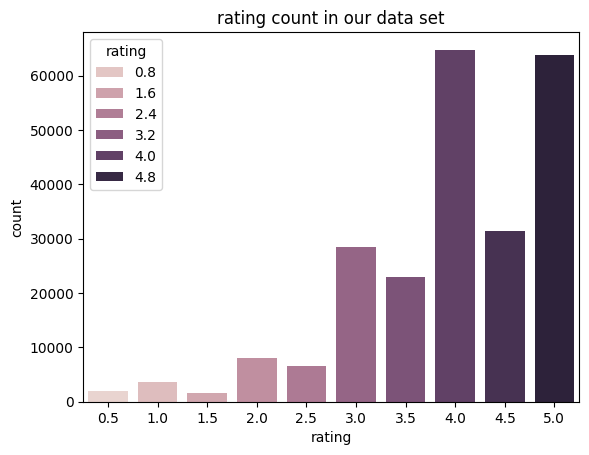

In [32]:
sns_xcount("rating", merged_data)


Rating has 0.5 as the smallest value and 5.0 as the biggest. Rating 4.0 and rating 5.0 both have the highest number of count
#
####  Highly Rated Movies

In [ ]:
# the average rating for each movie
average_ratings = merged_data.groupby('title')['rating'].mean().reset_index()

# Rename the columns for clarity
average_ratings.columns = ['title', 'avg_rating']

# Sort the movies by average rating in descending order
average_ratings = average_ratings.sort_values(by='avg_rating', ascending=False)

# bar plot to visualize the top 10 movies by average rating
plt.figure(figsize=(10, 6))
sns.barplot(x="avg_rating", y="title", data=round(average_ratings.head(10), 2), palette="viridis")
plt.title("Top 10 Movies by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.show()

Below we visually inspect the top 50 movie tags in our data

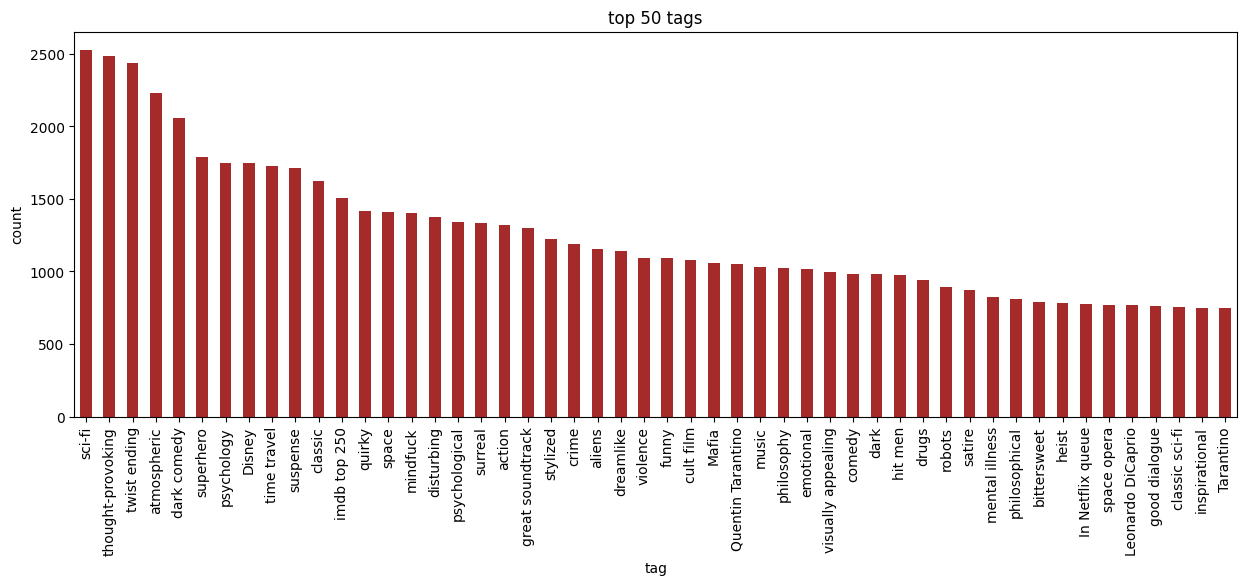

In [33]:
#plotting top 50 tags barplot using matplotlib
fig, ax = plt.subplots(figsize = (15,5))
merged_data ["tag"].value_counts().head(50).plot(kind = "bar", color = "brown")
plt.title("top 50 tags")
plt.xlabel("tag")
plt.ylabel("count")
plt.show();

Next we are also going to visualize the movie genres in our dataset

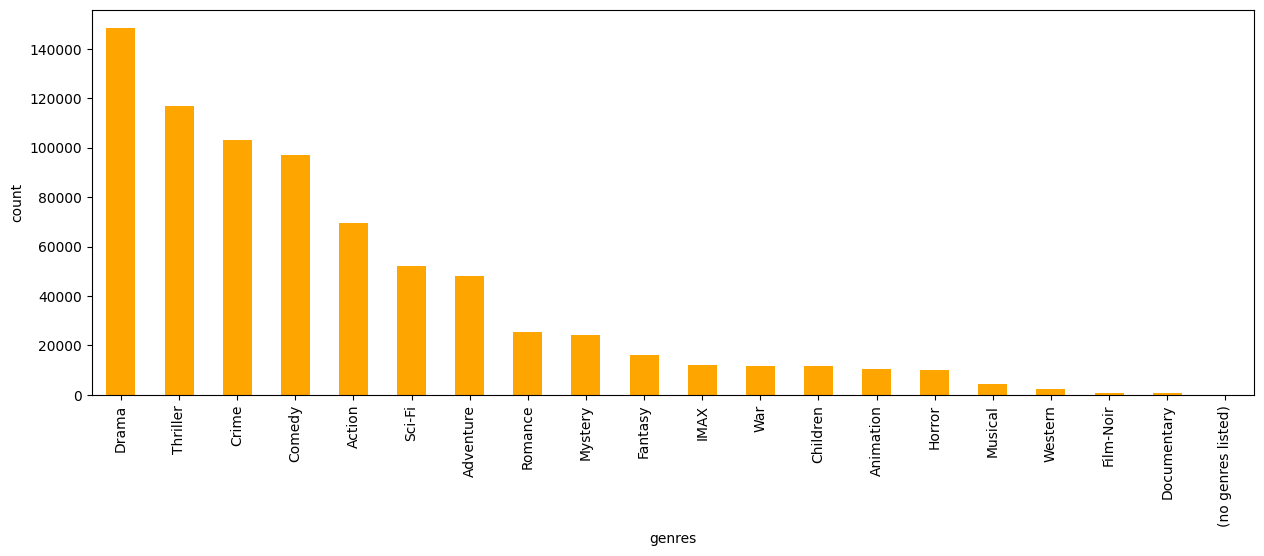

In [34]:
#getting each count of unique genre
genre_to_plot = merged_data["genres"].str.split("|", expand= True).stack().value_counts()
#plotting a barplot using matplotlib
fig, ax = plt.subplots(figsize = (15,5))
genre_to_plot.plot(kind = "bar", color = "orange")
sns.countplot()
plt.xlabel("genres")
plt.ylabel("count")
plt.show();

#### Top Watched Movies

In [ ]:
# Group by movie title and count the number of ratings, then sort in descending order
top_watched_movies = merged_data.groupby('title')['rating'].count().sort_values(ascending=False).head()
# bar plots with custom colors
plt.figure(figsize=(10, 6))
ax = top_watched_movies.plot(kind='bar', color= 'grey')
plt.title('Top 5 Most Watched Movies')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add the number of ratings on top of each bar
for i, v in enumerate(top_watched_movies):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=16, color='black')

plt.show()

#### 2.2 Bivariate exploratory analysis
#
Visualizing the trend of ratings yearly over the years

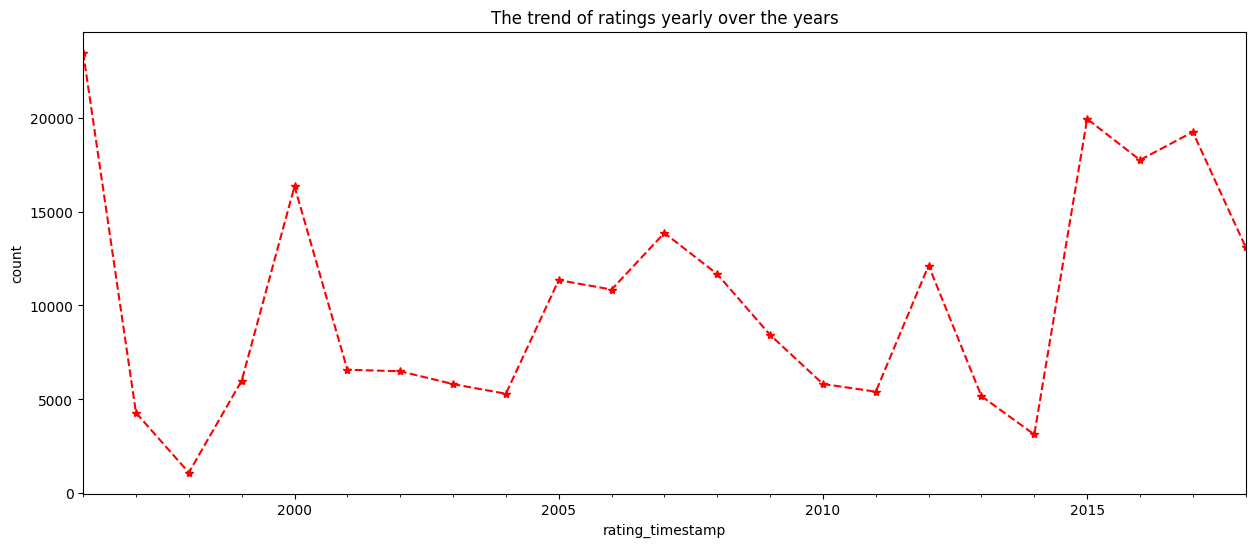

In [35]:
#set rating_timestamp as the index
trends_data = merged_data.set_index("rating_timestamp")
#yearly resampling 
yearly_trend = trends_data.resample("Y").size()
#plotting the trend
plt.figure(figsize= (15, 6))
yearly_trend.plot(marker = "*", linestyle = "--", color = "red")
plt.title("The trend of ratings yearly over the years")
plt.xlabel("rating_timestamp")
plt.ylabel("count")
plt.show();

Visualizing the trend of movie tagging

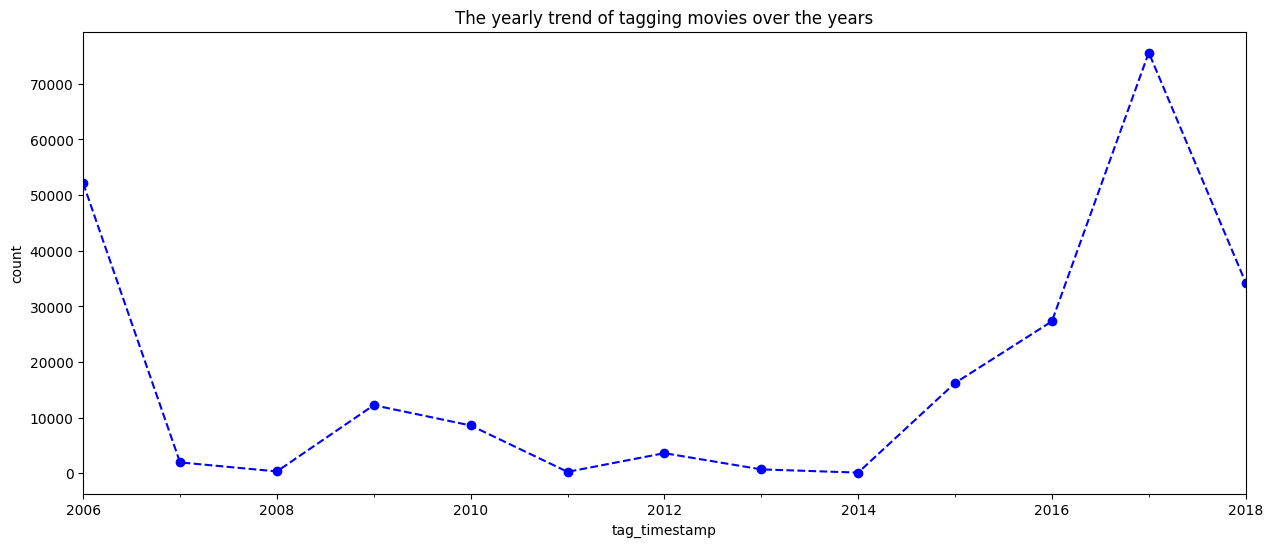

In [36]:
#set tag_timestamp as the index
tag_data = merged_data.set_index("tag_timestamp")
#yearly resampling 
yearly_trend = tag_data.resample("Y").size()
#plotting the trend
plt.figure(figsize= (15, 6))
yearly_trend.plot(marker = "o", linestyle = "--", color = "blue")
plt.title("The yearly trend of tagging movies over the years")
plt.xlabel("tag_timestamp")
plt.ylabel("count")
plt.show();

Checking the Distribution of our numerical columns

In [ ]:
# Visualize data distributions
merged_data.hist(figsize=(12, 8))
plt.show()

### 3. Modelling
#
For modelling purposes we will only use two datasets from the four available, that is, `movies` and `ratings` dataset. Below we merge the two dataframes so we can start our modelling.



In [37]:
#merging the two dataframes
modelling_data = pd.merge(movies, ratings, on = "movieId")
#dropping timestamp 
modelling_data.drop(columns= "timestamp", axis= 1, inplace= True)
modelling_data

movieId                                      title  \
0             1                           Toy Story (1995)   
1             1                           Toy Story (1995)   
2             1                           Toy Story (1995)   
3             1                           Toy Story (1995)   
4             1                           Toy Story (1995)   
...         ...                                        ...   
100831   193581  Black Butler: Book of the Atlantic (2017)   
100832   193583               No Game No Life: Zero (2017)   
100833   193585                               Flint (2017)   
100834   193587        Bungo Stray Dogs: Dead Apple (2018)   
100835   193609        Andrew Dice Clay: Dice Rules (1991)   

                                             genres  userId  rating  
0       Adventure|Animation|Children|Comedy|Fantasy       1     4.0  
1       Adventure|Animation|Children|Comedy|Fantasy       5     4.0  
2       Adventure|Animation|Children|Comedy|Fantasy       7     4.5  
3       Adventure|Animation|Children|Comedy|Fantasy      15     2.5  
4       Adventure|Animation|Children|Comedy|Fantasy      17     4.5  
...                                             ...     ...     ...  
100831              Action|Animation|Comedy|Fantasy     184     4.0  
100832                     Animation|Comedy|Fantasy     184     3.5  
100833                                        Drama     184     3.5  
100834                             Action|Animation     184     3.5  
100835                                       Comedy     331     4.0  

[100836 rows x 5 columns]

#### 3.1 Baseline model (Single Value Decomposition)
#
This is a model that uses collaborative filtering to make automatic predictions about the interests of a user by collecting preference and taste information from many users. 

In [38]:
#importing necessary modules
from surprise.prediction_algorithms import SVD
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy


In [39]:
#choosing data to use
baseline_data = modelling_data[["movieId", "userId", "rating"]]
#defining format of the input data
reader = Reader(rating_scale=(0.5, 5.0))

dataset = Dataset.load_from_df(baseline_data[["userId", "movieId", "rating"]], reader)
#splitting data into train and test set
train_data, test_data = train_test_split(dataset, test_size= 0.3, random_state= 42)

In [51]:
#instantiating the SVD model
base_model = SVD()
#fitting the trainset
base_model.fit(train_data)
#prediction on the test data
test_pred = base_model.test(test_data)
#rmse score for testset
accuracy.rmse(test_pred)

RMSE: 0.8756


0.8755797277719338

Our model has an rmse score of almost 0.88. This is  not a bad model for a start, we will go ahead and use it to make recommendations using it to a user. We will select a userId and number of recommendations we want the system to recommend. Before that we will remove the items that the unique user has rated

In [52]:
recommender_system(509, 5, baseline_data, base_model)

MovieId: 1204, Title: Lawrence of Arabia (1962), Genres: Adventure|Drama|War, Estimated Rating: 4.312050820837667
MovieId: 750, Title: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964), Genres: Comedy|War, Estimated Rating: 4.145289860888695
MovieId: 1199, Title: Brazil (1985), Genres: Fantasy|Sci-Fi, Estimated Rating: 4.067599504602481
MovieId: 1276, Title: Cool Hand Luke (1967), Genres: Drama, Estimated Rating: 4.062756472878519
MovieId: 858, Title: Godfather, The (1972), Genres: Crime|Drama, Estimated Rating: 4.061423813122732


We will try to define many parameters for our SVD model and see if it improves or not. GridsearchCV from `suprise` module will help use in defining and passing the parameters to our model. We shall use the RMSE score to compare the performance of the two models.

In [55]:
#importing gridsearch CV from surprise
from surprise.model_selection import GridSearchCV
#setting up the parameter grid
grid = {'n_factors':[20, 50, 100],'n_epochs': [5, 10, 50, 100, 150], 'lr_all': [0.002, 0.01, 0.02, 0.005],
        'reg_all': [0.2, 0.3, 0.4, 0.6]}
grid_model = GridSearchCV(SVD, param_grid= grid, n_jobs = -1, joblib_verbose=5)
grid_model.fit(dataset)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 23.8min finished


In [56]:
#best parameters
print(f"The best parameters from the grid are\n {grid_model.best_params}")


The best parameters from the grid are
 {'rmse': {'n_factors': 100, 'n_epochs': 150, 'lr_all': 0.01, 'reg_all': 0.2}, 'mae': {'n_factors': 100, 'n_epochs': 150, 'lr_all': 0.01, 'reg_all': 0.2}}


In [57]:
best_params_model = SVD(n_factors=100, n_epochs = 150, 
                        lr_all = 0.01, reg_all = 0.2)
#fitting training set
best_params_model.fit(train_data)
#predictions for test set
best_preds = best_params_model.test(test_data)
#rmse score
accuracy.rmse(best_preds)


RMSE: 0.8626


0.8626358808447333

In [58]:
recommender_system(509, 5, baseline_data, best_params_model)

MovieId: 8477, Title: Jetée, La (1962), Genres: Romance|Sci-Fi, Estimated Rating: 4.642976061270514
MovieId: 148881, Title: World of Tomorrow (2015), Genres: Animation|Comedy, Estimated Rating: 4.61480390549971
MovieId: 40491, Title: Match Factory Girl, The (Tulitikkutehtaan tyttö) (1990), Genres: Comedy|Drama, Estimated Rating: 4.593312438195517
MovieId: 5490, Title: The Big Bus (1976), Genres: Action|Comedy, Estimated Rating: 4.5233670065709575
MovieId: 26326, Title: Holy Mountain, The (Montaña sagrada, La) (1973), Genres: Drama, Estimated Rating: 4.518989223298985


Our tuned model seems to have little difference from the vanilla version. The RMSE difference is significantly low so we will build a neural network with few layers to see if it makes a difference

In [62]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from sklearn.metrics import mean_squared_error


# Assume you have a DataFrame with columns: userId, movieId, rating
# You might want to load your data and split it into training and testing sets
# For example, using Surprise library for SVD
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(baseline_data[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# SVD model
svd_model = SVD()
svd_model.fit(trainset)

# Get SVD predictions for the training set
train_svd_preds = [svd_model.predict(row.userId, row.movieId).est for _, row in baseline_data.iterrows()]

# Create a new DataFrame with SVD predictions as features
neural_train_preds = baseline_data.copy()
neural_train_preds['svd_preds'] = train_svd_preds

# Neural Network with SVD
user_items = baseline_data['userId'].nunique()
movie_items = baseline_data['movieId'].nunique()
embedding_dim = 50  # Adjust as needed

# User embedding
user_input = Input(shape=(1,), name='user_input')
user_embedding = Embedding(input_dim=user_items, output_dim=embedding_dim)(user_input)
user_flat = Flatten()(user_embedding)

# Movie embedding
movie_input = Input(shape=(1,), name='movie_input')
movie_embedding = Embedding(input_dim=movie_items, output_dim=embedding_dim)(movie_input)
movie_flat = Flatten()(movie_embedding)

# SVD input
svd_input = Input(shape=(1,), name='svd_input')

# Concatenate user, movie, and SVD embeddings
concatenated = Concatenate()([user_flat, movie_flat, svd_input])

# Neural network layers
dense_1 = Dense(128, activation='relu')(concatenated)
dense_2 = Dense(64, activation='relu')(dense_1)
output = Dense(1, activation='linear')(dense_2)
# Build the model
model = tf.keras.Model(inputs=[user_input, movie_input, svd_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit([neural_train_preds['userId'], neural_train_preds['movieId'], neural_train_preds['svd_preds']], neural_train_preds['rating'], epochs=150, batch_size=64)

# Get predictions for the test set
#converting test set to a dataframe
testset_columns = ['userId', 'movieId', 'rating']
test_df = pd.DataFrame(testset, columns=testset_columns)
#test prediction
test_svd_preds = [svd_model.predict(row.userId, row.movieId).est for _, row in test_df.iterrows()]
test_df_with_svd = testset.copy()
test_df_with_svd['svd_preds'] = test_svd_preds

# Evaluate the model
test_loss = model.evaluate([test_df_with_svd['userId'], test_df_with_svd['movieId'], test_df_with_svd['svd_preds']], test_df_with_svd['rating'])
print(f'Test Loss: {test_loss}')

# Make predictions on new data
new_data = pd.DataFrame({'userId': [1, 2], 'movieId': [100, 200], 'svd_preds': [svd_model.predict(1, 100).est, svd_model.predict(2, 200).est]})
predictions = model.predict([new_data['userId'], new_data['movieId'], new_data['svd_preds']])
print(f'Predictions: {predictions}')



Epoch 1/150
1576/1576 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.9722
Epoch 2/150
1576/1576 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.4094
Epoch 3/150
1576/1576 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.3720
Epoch 4/150
1576/1576 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.3464
Epoch 5/150
1576/1576 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.3265
Epoch 6/150
1576/1576 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.3090
Epoch 7/150
1576/1576 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 0.2916
Epoch 8/150
1576/1576 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.2736
Epoch 9/150
1576/1576 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.2628
Epoch 10/150
1576/1576 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.2486
Epoch 11/150
1576/1576 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.2409
Epoch 12/150
1576/1576 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.2295
Epoch 13/150
1576/1576 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.2208
Epoch 14/150
1576/1576 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.2132
Ep

TypeError: list indices must be integers or slices, not str

#### 3.2 KNN

In [ ]:
# Drop rows with missing values in the 'title' column
combine_movie_rating = merged_data.dropna(axis = 0, subset = ['title'])

# Group the DataFrame by 'title', count the number of ratings for each movie, and reset the index
movie_ratingCount = (combine_movie_rating.
    groupby(by = ['title'])['rating'].
    count().
    reset_index().
    rename(columns = {'rating': 'totalRatingCount'})
    [['title', 'totalRatingCount']]
    )
# Merging DataFrames: combine_movie_rating and movie_ratingCount
rating_with_totalRatingCount = combine_movie_rating.merge(movie_ratingCount, left_on = 'title', right_on = 'title', how = 'left')
rating_with_totalRatingCount.head()

# Format floating-point numbers in the output with three decimal places.
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(movie_ratingCount['totalRatingCount'].describe())

Filter the DataFrame rating_with_totalRatingCount based The condition is specified. It selects rows where the 'totalRatingCount' column is greater than or equal to the value stored in the popularity_threshold variable.

In [ ]:
# Set popularity threshhold 
popularity_threshold = 50

rating_popular_movie= rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_movie.head()

In [ ]:
#shape of our popular movies
rating_popular_movie.shape

Creating a pivot matrix

In [ ]:
# create a Pivot matrix
movie_features_df=rating_popular_movie.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features_df.head()

#### Working with k-nearest neighbors algorithm.
We will use cosine similarity for determining the distance between the neighbors

In [ ]:
#importing KNNBasic from surprise
from surprise import KNNBasic, accuracy
#defining columns to use 
data = merged_data[["movieId", "userId", "genres", "rating"]]
reader = Reader(rating_scale=(0.5, 5.0))
dataset = Dataset.load_from_df(data[["movieId", "userId", "rating"]], reader)

# Split the data into training and testing sets
train_data, test_data = train_test_split(dataset, test_size=0.3, random_state=10)
# Create KNNBasic model
knn_model = KNNBasic()

# Train the model on the training set
knn_model.fit(train_data)

# Make predictions on the test set
predictions = knn_model.test(test_data)

# Evaluate the model's performance
rmse = accuracy.rmse(predictions)
print(f'RMSE on test set for knn model: {rmse}')


We will use GridSearchCV to look for the best parameters to tune our basic model to see if it improves or not

In [ ]:
# Define the parameter grid for grid search
param_grid = {'k': [20, 30, 40],
            'sim_options': {'name': ['cosine', 'pearson'],
            'user_based': [False]}}

# Create an instance of the KNNBASIC algorithm
knn_model = KNNBasic()

# Create GridSearchCV object
grid_search = GridSearchCV(KNNBasic, param_grid, measures=['RMSE'], cv=5)

# Fit the grid search object to the data
grid_search.fit(dataset)

# Get the best parameters from the grid search
best_params = grid_search.best_params['rmse']
best_score = grid_search.best_score['rmse']


# Build the k-NN with Neigbours collaborative filtering model with the best parameters
knn_model = KNNBasic(k=best_params['k'], sim_options=best_params['sim_options'])

# Train the model on the training set
knn_model.fit(train_data)

# Make predictions on the test set
predictions = knn_model.test(test_data)

# Evaluate the model's performance
rmse = accuracy.rmse(predictions)
print(f'Best RMSE Score: {best_score}')
print(f'Best Parameters: {best_params}')
print(f'RMSE on test set: {rmse}')

The RMSE value calculated for the model on the test set is approximately 0.9715.

In [ ]:
# User ID for which you want to make recommendations
user_id = 5

# Get a list of all movie IDs in your dataset
all_movie_ids = np.unique(merged_data['movieId'])

# Create a list to store predicted ratings for unrated movies
predicted_ratings = []

# Predict ratings for the user on unrated movies
for movie_id in all_movie_ids:
    # Check if the user has already rated the movie
    if not ratings[(ratings['userId'] == user_id) & (ratings['movieId'] == movie_id)].empty:
        predicted_rating = knn_model.predict(user_id, movie_id)
        predicted_ratings.append((movie_id, predicted_rating.est))

# Sort the predicted ratings in descending order
predicted_ratings.sort(key=lambda x: x[1], reverse=True)

# Get the top 5 movie recommendations
top_5_recommendations = predicted_ratings[:5]

# Display the top 5 recommended movies
for movie_id, predicted_rating in top_5_recommendations:
    # Check if the condition results in a non-empty DataFrame
    if not movies[movies['movieId'] == movie_id].empty:
        movie_title = movies[movies['movieId'] == movie_id]['title'].values[0]
        rounded_rating = round(predicted_rating, 1)
        print(f"Movie: {movie_title}, Predicted Rating: {rounded_rating}")
    else:
        print(f"Movie with ID {movie_id} not found in movies_df")

### 3.3 KNNWithmeans

In [ ]:
#importing necessary modules
from surprise.prediction_algorithms import KNNWithMeans

# Load data into Surprise's Dataset format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(modelling_data[['userId', 'movieId', 'rating']], reader)

# Build a user-based collaborative filtering model using k-NN
sim_options = {'name': 'cosine', 'user_based': True}
model = KNNBasic(sim_options=sim_options)
trainset = data.build_full_trainset()
model.fit(trainset)

def recommend_top_movies(target_user_id, n=5):
    # Get all movie IDs that the user has not yet rated
    unrated_movies = modelling_data[modelling_data['movieId'].isin(modelling_data[modelling_data['userId'] == target_user_id]['movieId'])]

    # Create a list to store movie recommendations with titles and predicted ratings
    recommendations = []

    for _, row in unrated_movies.iterrows():
        # Predict the rating for each unrated movie
        predicted_rating = model.predict(target_user_id, row['movieId']).est

        # Append the movie title and predicted rating to the recommendations list
        recommendations.append((row['title'], predicted_rating))

    # Sort the recommendations by predicted rating in descending order
    recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)

    # Select the top n recommendations
    top_n_recommendations = recommendations[:n]

    return top_n_recommendations

# Example usage
target_user_id = 5
top_movie_recommendations = recommend_top_movies(target_user_id, n=5)
print(f"Top 5 movie recommendations for User{target_user_id}: ")
print("==================================================")
for movie, rating in top_movie_recommendations:
    print(f"{movie}: Predicted Rating - {rating}")

Item based

In [ ]:
# mean rating for each movie title
mean_ratings = pd.DataFrame(modelling_data.groupby('title')['rating'].mean())

# total number of ratings for each movie title
total_ratings = pd.DataFrame(modelling_data.groupby('title')['rating'].count())

# Renaming the 'rating' column to 'mean ratings' for clarity
mean_ratings.rename(columns={'rating': 'mean ratings'}, inplace=True)

# Add the 'total ratings' column to the 'mean_ratings' DataFrame
mean_ratings['total ratings'] = total_ratings
#show dataframe
mean_ratings

In [ ]:
# Make a copy of the original utility matrix
item_utility_matrix = movie_features_df.copy()

# Display the first 10 rows of the item utility matrix
item_utility_matrix.head(10)

In [ ]:
#Load the dataset from the dataframe
data = merged_data[["movieId", "userId", "genres", "rating"]]
reader = Reader(rating_scale=(0.5, 5.0))
dataset = Dataset.load_from_df(data[["movieId", "userId", "rating"]], reader)

# Split the data into training and testing sets
train_data, test_data = train_test_split(dataset, test_size=0.3, random_state=4)
# Create KNNWithMeans model
knn_model = KNNWithMeans()

# Train the model on the training set
knn_model.fit(train_data)

# Make predictions on the test set
predictions = knn_model.test(test_data)

# Evaluate the model's performance
rmse = accuracy.rmse(predictions)
print(f'RMSE on test set for knn model: {rmse}')


In [ ]:
# Load the dataset from the dataframe
data = merged_data[["movieId", "userId", "genres", "rating"]]
reader = Reader(rating_scale=(0.5, 5.0))
dataset = Dataset.load_from_df(data[["movieId", "userId", "rating"]], reader)

# Split the data into training and testing sets
train_data, test_data = train_test_split(dataset, test_size=0.3, random_state=4)

# Define the parameter grid for grid search
param_grid = {'k': [20, 30, 40],  # Adjust these values based on your preference
            'sim_options': {'name': ['cosine', 'pearson'],
            'user_based': [False]}}

# Create an instance of the KNNWithMeans algorithm
knn_model = KNNWithMeans()

# Create GridSearchCV object
grid_search = GridSearchCV(KNNWithMeans, param_grid, measures=['RMSE'], cv=3)

# Fit the grid search object to the data
grid_search.fit(dataset)

# Get the best parameters from the grid search
best_params = grid_search.best_params['rmse']
best_score = grid_search.best_score['rmse']


# Build the k-NN with means collaborative filtering model with the best parameters
knn_model = KNNWithMeans(k=best_params['k'], sim_options=best_params['sim_options'])

# Train the model on the training set
knn_model.fit(train_data)

# Make predictions on the test set
#predictions = knn_model.test(test_data)

# Evaluate the model's performance
#rmse = accuracy.rmse(predictions)
#print(f'Best Parameters: {best_params}')
#print(f'RMSE on test set: {rmse}')

# Use cross_validate with the Surprise Dataset
#from surprise.model_selection import cross_validate
#cv_knn_basic = cross_validate(knn_model, dataset, n_jobs=-1)

In [ ]:
predictions = knn_model.test(test_data)

# Evaluate the model's performance
rmse = accuracy.rmse(predictions)
print(f'Best RMSE Score: {best_score}')
print(f'Best Parameters: {best_params}')
print(f'RMSE on test set: {rmse}')

In [ ]:
# Use cross_validate with the Surprise Dataset
from surprise.model_selection import cross_validate
#cv_knn_basic = cross_validate(knn_model, dataset, n_jobs=-1)
cv_results = cross_validate(knn_model, dataset, measures=['RMSE'], cv=5, verbose=True)

## Making Recommendations

In [ ]:
# User ID for which you want to make recommendations
user_id = 5

# Get a list of all movie IDs in your dataset
all_movie_ids = np.unique(merged_data['movieId'])

# Create a list to store predicted ratings for unrated movies
predicted_ratings = []

# Predict ratings for the user on unrated movies
for movie_id in all_movie_ids:
    # Check if the user has already rated the movie
    if not ratings[(ratings['userId'] == user_id) & (ratings['movieId'] == movie_id)].empty:
        continue  # Skip if the user has rated the movie

    predicted_rating = knn_model.predict(user_id, movie_id)
    predicted_ratings.append((movie_id, predicted_rating.est))

# Sort the predicted ratings in descending order
predicted_ratings.sort(key=lambda x: x[1], reverse=True)

# Get the top 5 movie recommendations
top_5_recommendations = predicted_ratings[:5]

# Display the top 5 recommended movies
#for movie_id, predicted_rating in top_5_recommendations:
    #movie_title = movies_df[merged_df['movieId'] == movie_id]['title'].values[0]
# print(f"Movie: {movie_title}, Predicted Rating: {predicted_rating}")
# Display the top 5 recommended movies
for movie_id, predicted_rating in top_5_recommendations:
    # Check if the condition results in a non-empty DataFrame
    if not movies[movies['movieId'] == movie_id].empty:
        movie_title = movies[movies['movieId'] == movie_id]['title'].values[0]
        rounded_rating = round(predicted_rating, 1)
        print(f"Movie: {movie_title}, Predicted Rating: {rounded_rating}")
    else:
        print(f"Movie with ID {movie_id} not found in movies_df")



#### 3.4 Principal Component analysis